In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
stock = '^ixic'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25

In [11]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [12]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [13]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [14]:
df = data["Close"].pct_change() * 100

In [15]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [16]:
df1 = pd.merge(data,df, on="Date")
#df1

In [17]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [18]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [19]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [20]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [21]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [22]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [23]:
df1.dropna(inplace= True)

In [24]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [25]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [26]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [27]:
#crossovers = pd.DataFrame()
#crossovers['Dates'] = Short_MV_Avg_Span['Date']
#crossovers['Price'] = [i for i in df1.Close]
#crossovers['Short_MV_Avg_Span'] = Short_MV_Avg_Span['Close']
#crossovers['Long_MV_Avg_Span'] = Long_MV_Avg_Span['Close']
#crossovers

In [28]:
df1.dropna(inplace= True)
df1.tail(20)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
6396,1.0,2021-05-28,13792.049805,13820.870117,13747.610352,13748.740234,13748.740234,-12.304970,19.531616,0.090708,...,0.462686,-43.309570,-6.309570,73.259766,74.889648,1,13595.924386,13568.062462,27.861924,19.150648
6397,1.0,2021-06-01,13829.059570,13836.169922,13678.769531,13736.480469,13736.480469,-6.302957,-12.304970,-0.089170,...,0.015423,-92.579102,-43.309570,157.400391,73.259766,0,13609.310679,13574.667090,34.643590,27.861924
6398,1.0,2021-06-02,13743.240234,13775.889648,13689.740234,13756.330078,13756.330078,21.756780,-6.302957,0.144503,...,0.366651,13.089844,-92.579102,86.149414,157.400391,1,13623.312527,13581.791128,41.521399,34.643590
6399,1.0,2021-06-03,13655.750000,13684.129883,13548.929688,13614.509766,13614.509766,6.080268,21.756780,-1.030946,...,0.772958,-41.240234,13.089844,135.200195,86.149414,0,13622.474169,13583.074212,39.399957,41.521399
6400,1.0,2021-06-04,13697.250000,13826.820312,13692.009766,13814.490234,13814.490234,-19.108852,6.080268,1.468877,...,0.485059,117.240234,-41.240234,134.810547,135.200195,1,13640.761413,13592.149350,48.612063,39.399957
6401,1.0,2021-06-07,13802.820312,13889.110352,13784.889648,13881.719727,13881.719727,6.014556,-19.108852,0.486659,...,0.908538,78.899414,117.240234,104.220703,134.810547,1,13663.709824,13603.505051,60.204773,48.612063
6402,1.0,2021-06-08,13946.320312,13981.719727,13831.980469,13924.910156,13924.910156,28.051637,6.014556,0.311132,...,0.929087,-21.410156,78.899414,149.739258,104.220703,1,13688.586046,13616.109173,72.476873,60.204773
6403,1.0,2021-06-09,13980.230469,14003.500000,13906.450195,13911.750000,13911.750000,-4.859403,28.051637,-0.094508,...,0.620610,-68.480469,-21.410156,97.049805,149.739258,0,13709.839756,13627.702931,82.136825,72.476873
6404,1.0,2021-06-10,13933.879883,14031.190430,13904.400391,14020.330078,14020.330078,-12.807701,-4.859403,0.780492,...,0.054609,86.450195,-68.480469,126.790039,97.049805,1,13739.410263,13643.100074,96.310189,82.136825
6405,1.0,2021-06-11,14030.849609,14069.419922,14006.589844,14069.419922,14069.419922,-15.324880,-12.807701,0.350133,...,0.914344,38.570312,86.450195,62.830078,126.790039,1,13770.839754,13659.818499,111.021255,96.310189


In [29]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.show(close=None, block=None)>

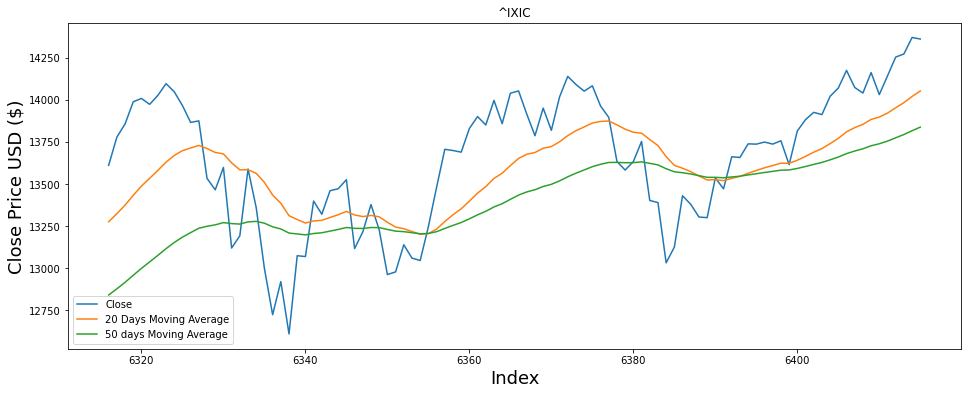

In [30]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
plt.title(stock.upper())
plt.show

In [31]:
y = df1["Up_Down"].values

In [32]:
model = sm.Logit(y,X)

In [33]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.687177
         Iterations 4


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6413
Model:                          Logit   Df Residuals:                     6407
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                0.001495
Time:                        13:24:43   Log-Likelihood:                -4406.9
converged:                       True   LL-Null:                       -4413.5
Covariance Type:            nonrobust   LLR p-value:                   0.02160
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1806      0.062      2.916      0.004       0.059       0.302
Trend_Lag                                  0.0390      0.094      0.414      0.679      -0.146       0.224
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0008      0.000      3.283      0.001       0.000       0.001
Close-Open_Lag                            -0.0008      0.001     -1.197      0.231      -0.002       0.001
High-Low_Lag                              -0.0005      0.000     -1.114      0.265      -0.001       0.000
Volume_Lag                                 0.0003      0.001      0.257      0.798      -0.002       0.002
==========================================================================================================
"""

In [35]:
prediction = result.predict(X)

In [36]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [37]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [38]:
y = df1["Up_Down"].values

In [39]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [40]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,94,2794
Up,103,3422


In [41]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5482613441447061


In [42]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.5572107765451664


In [43]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [44]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [45]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [46]:
#df1.tail(10)

In [47]:
print("\nIf ${:,.2f} was invested in [ {} ], and Just Hold and Not Trade for {:,} years, the ROI = ${:,.2f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100.00 was invested in [ ^IXIC ], and Just Hold and Not Trade for 26 years, the ROI = $1,367.82


In [48]:
print ("\nIf ${:,.2f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.2f}".format(invest, diff_years, (money + (share * df1.iloc[-1,6]))))


If $100.00 was invested 26 years ago, buy and sell according this script's recommandation, the ROI = $1,293.03


In [49]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
6401 2021-06-07                       Up                Up
6402 2021-06-08                       Up                Up
6403 2021-06-09                     Down                Up
6404 2021-06-10                       Up                Up
6405 2021-06-11                       Up                Up
6406 2021-06-14                       Up                Up
6407 2021-06-15                     Down                Up
6408 2021-06-16                     Down                Up
6409 2021-06-17                       Up                Up
6410 2021-06-18                     Down                Up
6411 2021-06-21                       Up                Up
6412 2021-06-22                       Up                Up
6413 2021-06-23                       Up                Up
6414 2021-06-24                       Up                Up
6415 2021-06-25                     Down                Up


In [50]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [51]:
#print(df1.iloc[len(df1)-1,[1,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
#df1.info()

In [52]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ ^IXIC ] actually went down, --- base on yesterday's data, We Predication [ ^IXIC ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [53]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [54]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.687053
         Iterations 4


In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 6292
Model:                          Logit   Df Residuals:                     6286
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                0.001606
Time:                        13:24:45   Log-Likelihood:                -4322.9
converged:                       True   LL-Null:                       -4329.9
Covariance Type:            nonrobust   LLR p-value:                   0.01623
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1969      0.063      3.107      0.002       0.073       0.321
Trend_Lag                                  0.0034      0.096      0.036      0.972      -0.185       0.192
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0009      0.000      3.542      0.000       0.000       0.001
Close-Open_Lag                            -0.0004      0.001     -0.560      0.576      -0.002       0.001
High-Low_Lag                              -0.0004      0.000     -0.888      0.375      -0.001       0.001
Volume_Lag                                 0.0002      0.001      0.167      0.867      -0.002       0.002
==========================================================================================================
"""

In [56]:
#print(result.summary().as_csv())

In [57]:
summary_list=result.summary().as_csv().split(",")

In [58]:
#print(summary_list)

In [59]:
#print(summary_list[37:39])

In [60]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,0,56
Up,1,64


In [61]:
z = confusion_matrix(y_test,prediction)

In [62]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5289 <=========



In [63]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 19], df1.iloc[-1, 12], df1.iloc[-1, 14], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5962,   [ ^IXIC ] will go up! <=========


In [64]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 166.1200....178.2496....189.1622....203.4308....214.5522....<=============

 ============> No Trading Waring at this time! <=============


In [65]:
#df1.to_csv('fb.csv', index = False)